### 회귀분석

In [3]:
!pip install statsmodels

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels
import statsmodels.formula.api as smf 

statsmodels.__version__

'0.14.1'

In [10]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [13]:
model = smf.ols(formula = "sepal_length ~ sepal_width", data = iris).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Fri, 12 Jan 2024   Prob (F-statistic):              0.152
Time:                        11:20:19   Log-Likelihood:                -183.00
No. Observations:                 150   AIC:                             370.0
Df Residuals:                     148   BIC:                             376.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5262      0.479     13.628      0.000       5.580       7.473
sepal_width    -0.2234      0.155     -1.440      0.152      -0.530       0.083
==============================================================================
Omnibus:                        4.389   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.237
Skew:                           0.360   Prob(JB):                        0.120
Kurtosis:                       2.600   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
intercept = model.params.Intercept # y절편(상수항)
slope = model.params.sepal_width # 기울기

print(intercept, slope)

6.526222550894483 -0.22336106112990034


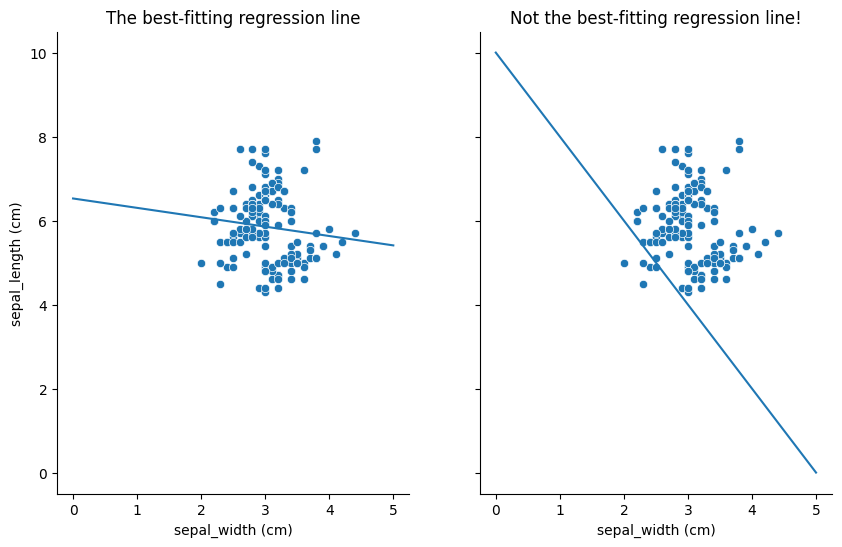

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
x = np.linspace(0,5)

sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length', ax = ax[0])
fig.axes[0].set_title("The best-fitting regression line")
fig.axes[0].set_xlabel("sepal_width (cm)")
fig.axes[0].set_ylabel("sepal_length (cm)")
fig.axes[0].plot(x,slope*x+intercept)

sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length', ax = ax[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel("sepal_width (cm)")
fig.axes[1].set_ylabel("sepal_length (cm)")
fig.axes[1].plot(x,-2*x+10)

sns.despine()
plt.show()

In [20]:
!pip install pingouin

In [21]:
import pingouin as pg

mod1 = pg.linear_regression(iris['sepal_width'], iris['sepal_length'])
mod1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.53,0.48,13.63,0.00,0.01,0.01,5.58,7.47
1,sepal_width,-0.22,0.16,-1.44,0.15,0.01,0.01,-0.53,0.08


In [22]:
predictors = ['sepal_width', 'petal_length']
outcome = 'sepal_length'

mod2 = pg.linear_regression(iris[predictors], iris[outcome])
mod2.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.25,0.25,9.07,0.0,0.84,0.84,1.76,2.74
1,sepal_width,0.60,0.07,8.59,0.0,0.84,0.84,0.46,0.73
2,petal_length,0.47,0.02,27.57,0.0,0.84,0.84,0.44,0.51


width, length 두 독립변수 모두 유의
그럼 어느 변수가 더 중요하냐?
====> 기울기 보고 판단 x, 상관계수를 보고 판단

In [23]:
iris.loc[:, ['sepal_length', 'sepal_width', 'petal_length']].rcorr()

C:\projectds\venv\Lib\site-packages\pingouin\correlation.py:1111: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(replace_pval)


,sepal_length,sepal_width,petal_length
sepal_length,-,,***
sepal_width,-0.118,-,***
petal_length,0.872,-0.428,-


In [24]:
# 상관계수

mod3 = pg.linear_regression(iris['petal_length'], iris['sepal_length'])
mod3.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.31,0.08,54.94,0.0,0.76,0.76,4.15,4.46
1,petal_length,0.41,0.02,21.65,0.0,0.76,0.76,0.37,0.45


In [25]:
# 결정계수

mod4 = pg.linear_regression(iris['sepal_width'], iris['sepal_length'])
mod4.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.53,0.48,13.63,0.00,0.01,0.01,5.58,7.47
1,sepal_width,-0.22,0.16,-1.44,0.15,0.01,0.01,-0.53,0.08


## tips 데이터를 활용해서 회귀분석
- 종속변수 tip
- 독립변수 자유

In [28]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


                                 OLS Regression Results                                
Dep. Variable:                    tip   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.891
Method:                 Least Squares   F-statistic:                              2004.
Date:                Fri, 12 Jan 2024   Prob (F-statistic):                   2.26e-119
Time:                        15:44:06   Log-Likelihood:                         -366.22
No. Observations:                 244   AIC:                                      734.4
Df Residuals:                     243   BIC:                                      737.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

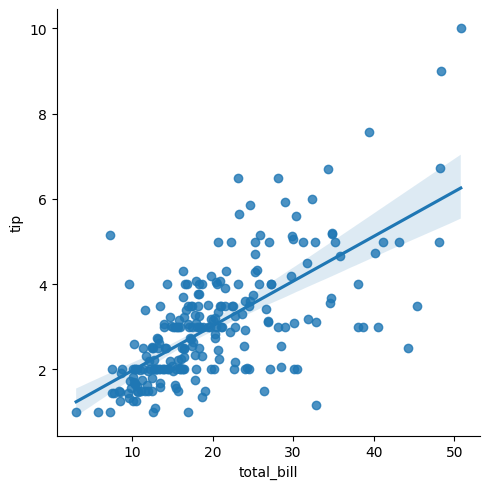

In [31]:
import seaborn as sns
import statsmodels.api as sm

# seaborn의 lmplot 함수를 사용하여 회귀분석 시각화
sns.lmplot(x='total_bill', y='tip', data=tips)

# 독립변수
X = tips['total_bill']

# 종속변수
y = tips['tip']

# OLS(Ordinary Least Squares) 모델을 통한 회귀분석
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())